In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText

### Bring in data from a few select stations and plot the time series (to illustrate the frontal passage at multiple locations)

In [61]:
#Stations to plot: KCYS; STN01; KAKO; GLY04; FCC01; NREL

######## get data and prep

#### 1-minute asos
asos = pd.read_csv("https://mesonet.agron.iastate.edu/cgi-bin/request/asos1min.py?station=AKO&station=CYS&station=SNY&station=LIC&station=DEN&tz=UTC&year1=2022&month1=12&day1=21&hour1=0&minute1=0&year2=2022&month2=12&day2=23&hour2=22&minute2=0&vars=tmpf&sample=1min&what=download&delim=comma&gis=yes",
                   parse_dates=['valid(UTC)'])
    
asos['datetime'] = asos['valid(UTC)'].dt.tz_localize("UTC")
asos.set_index("datetime", inplace=True)

### F to C
asos['tmpc'] = (pd.to_numeric(asos['tmpf'],errors='coerce')-32.)/1.8

### subset down in time
asos = asos['2022-12-21 17:00':'2022-12-22 02:30'] 




In [50]:
### CoAgMET
#coag = pd.read_csv("https://coagmet.colostate.edu/data/5min.csv?header=yes&from=2022-12-21&tz=utc&units=m&fields=t&stations=fcc01,gly04,stn01",
#                   skiprows=[1], parse_dates=['Date and Time'])
### no FCC01
coag = pd.read_csv("https://coagmet.colostate.edu/data/5min.csv?header=yes&from=2022-12-21&tz=utc&units=m&fields=t&stations=gly04,stn01",
                  skiprows=[1], parse_dates=['Date and Time'])

meta = pd.read_csv("https://coagmet.colostate.edu/data/metadata.csv?header=yes")
coag = coag.merge(meta)

coag.replace(-999.,np.nan,inplace=True)
coag['datetime'] = pd.to_datetime(coag['Date and Time']).dt.tz_localize("UTC")
coag.set_index(['datetime'],inplace=True)

### subset down in time
coag = coag['2022-12-21 17:00':'2022-12-22 02:30'] 

coag


,Station,Date and Time,Air Temp,Name,Location,Latitude (degN),Longitude (degE),Elevation (ft),Anemometer Height (m),Active,Irrigation,First Observation,Last Observation,Timestep (s),Network
datetime,,,,,,,,,,,,,,,
2022-12-21 17:00:00+00:00,gly04,2022-12-21 17:00:00,-1.26,Greeley 4,1.5 mi N of Greeley Airport,40.45,-104.6,4683,2,active,full,06/05/2008,12/19/2023,300,Coag
2022-12-21 17:05:00+00:00,gly04,2022-12-21 17:05:00,-0.97,Greeley 4,1.5 mi N of Greeley Airport,40.45,-104.6,4683,2,active,full,06/05/2008,12/19/2023,300,Coag
2022-12-21 17:10:00+00:00,gly04,2022-12-21 17:10:00,-0.45,Greeley 4,1.5 mi N of Greeley Airport,40.45,-104.6,4683,2,active,full,06/05/2008,12/19/2023,300,Coag
2022-12-21 17:15:00+00:00,gly04,2022-12-21 17:15:00,-0.41,Greeley 4,1.5 mi N of Greeley Airport,40.45,-104.6,4683,2,active,full,06/05/2008,12/19/2023,300,Coag
2022-12-21 17:20:00+00:00,gly04,2022-12-21 17:20:00,-0.40,Greeley 4,1.5 mi N of Greeley Airport,40.45,-104.6,4683,2,active,full,06/05/2008,12/19/2023,300,Coag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22 02:10:00+00:00,stn01,2022-12-22 02:10:00,-21.18,Stratton,Stratton,39.30,-102.5,4321,3,active,dry,04/02/2006,12/19/2023,300,Coag
2022-12-22 02:15:00+00:00,stn01,2022-12-22 02:15:00,-21.28,Stratton,Stratton,39.30,-102.5,4321,3,active,dry,04/02/2006,12/19/2023,300,Coag
2022-12-22 02:20:00+00:00,stn01,2022-12-22 02:20:00,-21.32,Stratton,Stratton,39.30,-102.5,4321,3,active,dry,04/02/2006,12/19/2023,300,Coag


In [51]:
### and NWTC 2-m temperature data
nrel = pd.read_csv("https://midcdmz.nrel.gov/apps/plot.pl?site=NWTC&start=20010824&edy=19&emo=12&eyr=2023&year=2022&month=12&day=21&endyear=2022&endmonth=12&endday=24&time=0&inst=7&type=data&wrlevel=2&preset=0&first=3&math=0&second=-1&value=0.0&user=0&axis=1",
                  parse_dates=[["DATE (MM/DD/YYYY)","MST"]])

nrel['datetime'] = pd.to_datetime(nrel["DATE (MM/DD/YYYY)_MST"]).dt.tz_localize("Etc/GMT+7")
nrel['datetime'] = nrel['datetime'].dt.tz_convert("UTC")

nrel.set_index(['datetime'],inplace=True)

#nrel.rename({"Temperature @ 2m [deg C]":"tmpc"})

### subset down in time
nrel = nrel['2022-12-21 17:00':'2022-12-22 02:30'] 

nrel



,DATE (MM/DD/YYYY)_MST,Temperature @ 2m [deg C]
datetime,,
2022-12-21 17:00:00+00:00,2022-12-21 10:00:00,6.105
2022-12-21 17:01:00+00:00,2022-12-21 10:01:00,6.167
2022-12-21 17:02:00+00:00,2022-12-21 10:02:00,6.101
2022-12-21 17:03:00+00:00,2022-12-21 10:03:00,6.090
2022-12-21 17:04:00+00:00,2022-12-21 10:04:00,6.143
...,...,...
2022-12-22 02:26:00+00:00,2022-12-21 19:26:00,-20.480
2022-12-22 02:27:00+00:00,2022-12-21 19:27:00,-20.470
2022-12-22 02:28:00+00:00,2022-12-21 19:28:00,-20.500


### now plot them

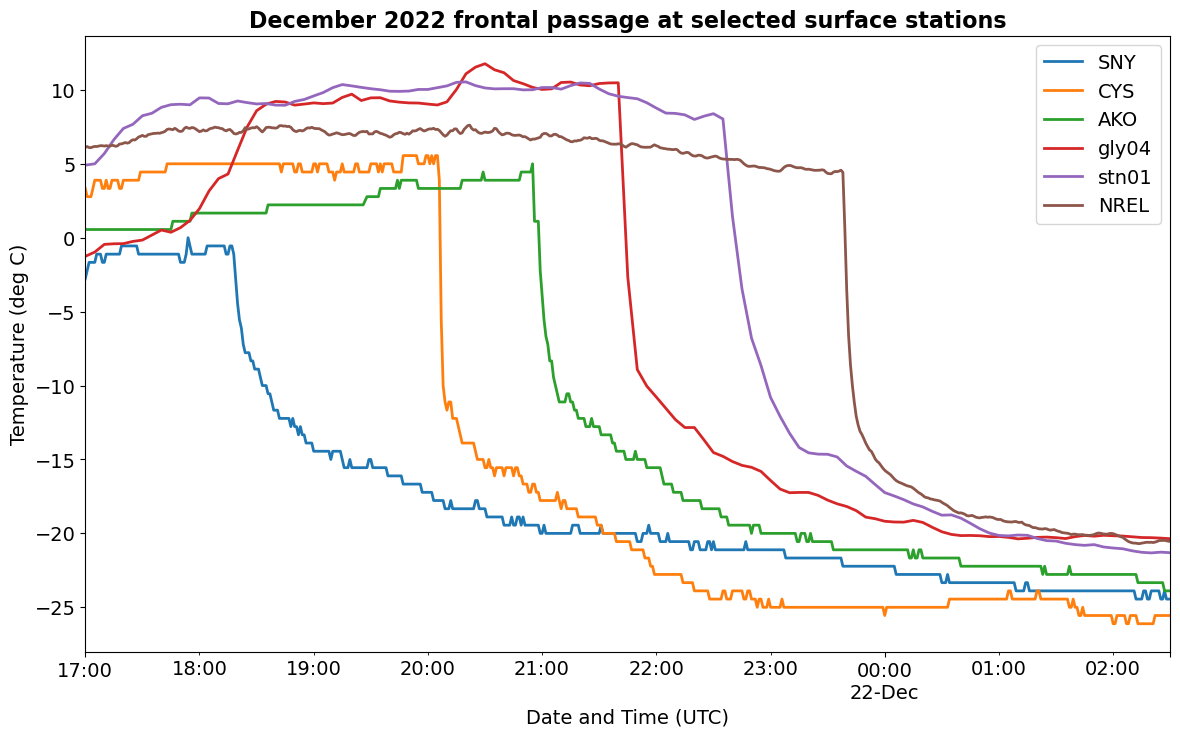

In [64]:
fig, ax = plt.subplots(figsize=(14, 8))

#for stn in asos.station.unique():
#for stn in ["SNY","CYS","AKO","DEN","LIC"]:
for stn in ["SNY","CYS","AKO"]:
    asos[asos['station']==stn]['tmpc'].plot(ax=ax, lw=2, label=stn)
    
for stn in coag.Station.unique():
    coag[coag['Station']==stn]['Air Temp'].plot(ax=ax, lw=2, label=stn)
    
nrel["Temperature @ 2m [deg C]"].plot(ax=ax, lw=2,label='NREL')

ax.set_title("December 2022 frontal passage at selected surface stations",fontsize=16,fontweight='bold')
ax.set_xlabel("Date and Time (UTC)", fontsize=14)
ax.set_ylabel("Temperature (deg C)",fontsize=14)
ax.tick_params(axis='both', which='both',labelsize=14)

ax.legend(fontsize=14)

fig.savefig("sfcobs_select_tser.pdf", 
            facecolor='white', transparent=False, bbox_inches='tight')

plt.show()

plt.close('all')

In [60]:
data_east.set_index([data_east.index,"Station"],inplace=True)

In [61]:
data_east['shifted_30min'] = data_east.unstack().shift(30, freq='min').stack()['Air Temp']
data_east['shifted_60min'] = data_east.unstack().shift(60, freq='min').stack()['Air Temp']
data_east['shifted_90min'] = data_east.unstack().shift(90, freq='min').stack()['Air Temp']

data_east['Tchange_30min'] = data_east['shifted_30min'] - data_east['Air Temp']
data_east['Tchange_60min'] = data_east['shifted_60min'] - data_east['Air Temp']
data_east['Tchange_90min'] = data_east['shifted_90min'] - data_east['Air Temp']

In [62]:
data_east.sort_values(by='Tchange_30min',ascending=False)

,,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed,Gust Dir,Name,...,First Observation,Last Observation,Timestep (s),Network,shifted_30min,shifted_60min,shifted_90min,Tchange_30min,Tchange_60min,Tchange_90min
Date and Time,Station,,,,,,,,,,,,,,,,,,,,,
2022-12-21 15:10:00,gly04,9.86,0.491,-5.47,105.38,0.0,22.64,19.9,28.48,16.5,Greeley 4,...,06/05/2008,12/21/2022,300,Coag,50.86,50.90,52.09,41.00,41.04,42.23
2022-12-21 16:20:00,fcc01,2.61,0.504,-11.69,25.87,0.0,6.74,67.8,11.05,40.1,Christman Field,...,09/16/1997,12/21/2022,300,Coag,43.41,44.26,44.28,40.80,41.65,41.67
2022-12-21 15:50:00,ftc03,4.55,0.446,-12.33,103.18,0.0,24.52,31.8,31.97,33.8,CSU - ARDEC,...,05/08/1992,12/21/2022,300,Coag,45.09,46.63,46.60,40.54,42.08,42.05
2022-12-21 16:15:00,fcc01,3.11,0.518,-10.64,35.16,0.0,8.52,45.2,15.13,23.9,Christman Field,...,09/16/1997,12/21/2022,300,Coag,43.28,44.29,43.87,40.17,41.18,40.76
2022-12-21 16:20:00,ftc01,2.62,0.507,-11.54,26.25,0.0,3.92,80.2,8.67,11.6,Fort Collins AERC,...,02/01/1992,12/21/2022,300,Coag,42.47,43.94,43.66,39.85,41.32,41.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 00:05:00,yum02,17.78,0.726,10.47,0.00,0.0,6.46,126.0,8.00,114.3,Yuma,...,05/08/1996,12/21/2022,300,Coag,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-21 00:10:00,yum02,17.85,0.723,10.45,0.00,0.0,6.25,120.6,8.67,121.5,Yuma,...,05/08/1996,12/21/2022,300,Coag,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-21 00:15:00,yum02,17.85,0.724,10.47,0.00,0.0,7.81,133.6,9.17,122.0,Yuma,...,05/08/1996,12/21/2022,300,Coag,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data_east.sort_values(by='Tchange_60min',ascending=False)

,,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed,Gust Dir,Name,...,First Observation,Last Observation,Timestep (s),Network,shifted_30min,shifted_60min,shifted_90min,Tchange_30min,Tchange_60min,Tchange_90min
Date and Time,Station,,,,,,,,,,,,,,,,,,,,,
2022-12-21 16:20:00,ftc03,-2.09,0.497,-16.33,11.97,0.0,31.16,19.8,39.24,28.0,CSU - ARDEC,...,05/08/1992,12/21/2022,300,Coag,4.55,45.09,46.63,6.64,47.18,48.72
2022-12-21 16:15:00,ftc03,-1.62,0.464,-17.24,15.05,0.0,28.95,26.1,40.69,33.4,CSU - ARDEC,...,05/08/1992,12/21/2022,300,Coag,7.74,45.05,47.01,9.36,46.67,48.63
2022-12-21 16:10:00,ftc03,-1.16,0.456,-17.15,39.95,0.0,25.41,23.3,30.42,54.1,CSU - ARDEC,...,05/08/1992,12/21/2022,300,Coag,9.79,45.24,47.16,10.95,46.40,48.32
2022-12-21 15:40:00,gly04,4.75,0.496,-10.00,66.13,0.0,22.06,14.4,28.14,326.5,Greeley 4,...,06/05/2008,12/21/2022,300,Coag,9.86,50.86,50.90,5.11,46.11,46.15
2022-12-21 15:35:00,gly04,5.38,0.497,-9.38,68.40,0.0,25.90,12.2,33.67,6.6,Greeley 4,...,06/05/2008,12/21/2022,300,Coag,11.23,50.85,50.13,5.85,45.47,44.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 00:35:00,yum02,17.85,0.721,10.38,0.00,0.0,7.89,142.8,10.51,138.9,Yuma,...,05/08/1996,12/21/2022,300,Coag,17.78,NaN,NaN,-0.07,NaN,NaN
2022-12-21 00:40:00,yum02,17.84,0.724,10.46,0.00,0.0,6.76,144.3,8.84,136.3,Yuma,...,05/08/1996,12/21/2022,300,Coag,17.85,NaN,NaN,0.01,NaN,NaN
2022-12-21 00:45:00,yum02,17.86,0.725,10.51,0.00,0.0,5.61,146.7,7.16,143.5,Yuma,...,05/08/1996,12/21/2022,300,Coag,17.85,NaN,NaN,-0.01,NaN,NaN
